In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df=pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


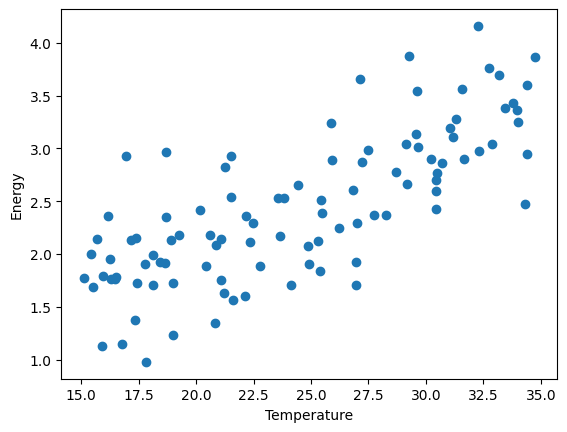

In [ ]:
#scatter plot
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.show()

In [ ]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [ ]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
#feature (independent variable) and target (dependent variable)
#indepentent variable (temperature)
X=df[['Temperature (°C)']]
#dependent variable (energy consumption)
y=df['Energy Consumption (kWh)']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Slope: ",model.coef_ )
print("y-intercept: ",model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [ ]:
#y=mx+c

print(model.coef_*28.25 + model.intercept_)


[2.76350858]


In [ ]:
#make prediction on the test set
y_pred = model.predict(X_test)
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
r2=r2_score(y_test,y_pred)
print("R-squared: ",r2)


Mean Squared Error:  0.16342487842925055
R-squared:  0.6119478445218713


Text(0.5, 1.0, 'Temperature vs Energy Consumption')

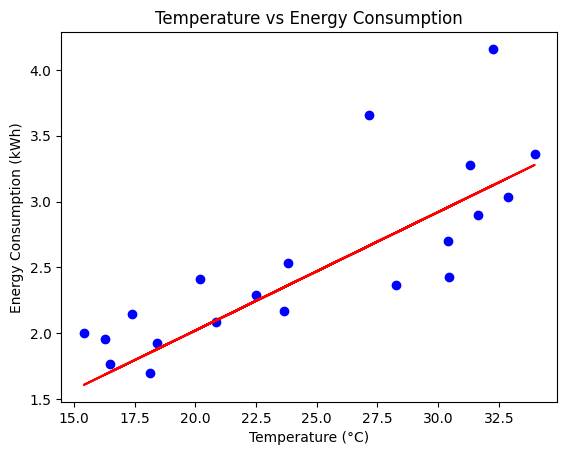

In [ ]:
plt.scatter(X_test,y_test,color='blue',label="Test Data")
plt.plot(X_test,y_pred,color='red',label="Regression Line")
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')

In [ ]:
import joblib
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [ ]:
temp=np.array([22.49])
prediction=model.predict(temp.reshape(1,-1))
print(prediction)

[2.24530337]


In [ ]:
#to use the pkl file for predication
loaded_model=joblib.load('appliance_energy_model.pkl')
result=loaded_model.predict([[28.25]])
print(result)



[2.76350858]
